In [1]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import nltk
from sklearn.metrics import confusion_matrix, classification_report
import string
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import bigrams
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
import seaborn as sns
import matplotlib.pyplot as plt
from afinn import Afinn
from collections import Counter
from itertools import tee
afinn = Afinn()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
castle_reviews = pd.read_csv("C:\\Users\\Lukasz\\Downloads\\castle_user_reviews.csv")
castle_details = pd.read_csv("C:\\Users\\Lukasz\\Downloads\\castle_details.csv")

In [4]:
castle_reviews

,Name,Author,Rating,Review
0,Hotel Grad Otočec,Ivet Sotirova,4,"More than a great and magical place. Clean, ta..."
1,Hotel Grad Otočec,Gordana Podvezanec,5,"The Otočec castle, built on one of the islands..."
2,Hotel Grad Otočec,Blaž Lusavec,5,Very tasty large cup of cappuccino and very go...
3,Hotel Grad Otočec,Uros R.,5,A beautiful castle to visit on an island on Kr...
4,Hotel Grad Otočec,Bogdan Tertinek,5,This magnificent five-stars hotel hosts also a...
...,...,...,...,...
2546,Oystermouth Castle,Kate Long,5,Really interesting castle with a long and rich...
2547,Oystermouth Castle,Mia Thurgood,5,"Very nice castle, prices were good and family ..."
2548,Oystermouth Castle,Rohit Mishra,4,A perfect visit on a sunny day. It's a old cas...
2549,Oystermouth Castle,Joseph Emman Pineda,4,This is definitely worth a stop if you're visi...


In [5]:
castle_details

,Name,Latitude,Longitude,Adminstrative_Area_Level_1,Adminstrative_Area_Level_2,Municipality,Country,Postal_Code,Address,Editorial_Summary,Open_Hours,User_Rating,Wheelchair_Accessible_Entrance,Phone_Number,International_Phone_Number,Website
0,Hotel Grad Otočec,45.838009,15.234847,NaN,NaN,Novo mesto,Slovenia,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/
1,Reszel Castle,54.048351,21.148280,Reszel,Powiat kętrzyński,Warmińsko-Mazurskie,Poland,11-440,"Podzamcze 3, 11-440 Reszel, Poland",Regal hotel in a 15th-century castle offering ...,"['Monday: 0800 - 2200', 'Tuesday: 0800 - 2200'...",5054.0,False,89 755 01 09,+48 89 755 01 09,http://www.zamek-reszel.com/
2,Zamek w Krasiczynie | Hotel | Restauracja Rene...,49.776379,22.650112,Krasiczyn,Powiat przemyski,Podkarpackie,Poland,37-741,"Zamek, Zamek, 37-741 Krasiczyn, Poland",Relaxed quarters in a 17th-century castle hote...,NaN,7691.0,True,16 671 83 21,+48 16 671 83 21,http://www.krasiczyn.com.pl/
3,Riegersburg Castle,47.004916,15.932297,Riegersburg,Südoststeiermark,Steiermark,Austria,8333,"Riegersburg 1, 8333 Riegersburg, Austria",Castle atop a dormant volcano featuring a witc...,"['Monday: 0900 - 1800', 'Tuesday: 0900 - 1800'...",4975.0,False,03153 82131,+43 3153 82131,https://www.dieriegersburg.at/
4,Kost,50.490204,15.135199,Libošovice,Jičín,Královéhradecký kraj,Czechia,50601,"Podkost 1, 506 01 Libošovice, Czechia",14th-century fortress with tours of armory & t...,"['Monday: 0900 - 1800', 'Tuesday: 0900 - 1800'...",9225.0,False,721 756 041,+420 721 756 041,http://www.kost-hrad.cz/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Restormel Castle,50.421576,-4.671019,NaN,Cornwall,England,United Kingdom,PL220EE,"Restormel Rd, Lostwithiel PL22 0EE, UK","Romantic hilltop castle ruins for picnics, pan...","['Monday: 1000 - 1700', 'Tuesday: 1000 - 1700'...",843.0,True,01208 872687,+44 1208 872687,http://www.english-heritage.org.uk/visit/place...
586,Capela de São Brás,39.493942,-7.960963,NaN,NaN,Portalegre District,Portugal,6040,"Belver, 6040, Portugal",NaN,NaN,2.0,False,NaN,NaN,NaN
587,Bamburgh Castle,55.608960,-1.709900,NaN,Northumberland,England,United Kingdom,NE697DF,"Bamburgh NE69 7DF, UK","One-time seat of the Kings of Northumbria, wit...","['Monday: 1000 - 1700', 'Tuesday: 1000 - 1700'...",13251.0,True,01668 214208,+44 1668 214208,https://www.bamburghcastle.com/
588,Park Or Dunamase,53.033874,-7.224758,NaN,NaN,County Laois,Ireland,NaN,"Park Or Dunamase, Co. Laois, Ireland",NaN,NaN,NaN,False,NaN,NaN,NaN


In [6]:
castle_reviews['Rating'].value_counts()

Rating
5    1861
4     523
3      87
1      48
2      32
Name: count, dtype: int64

As we can see there is a bid disparity between high ratings and low ratings. This is expected as the castles are something that is a tourist attraction and people often go out of their way in order to see a specific castle. This means that a lot of times they will be happy and content with what they saw and hence the high ammount of positive reviews. That is why we decided to consider reviews with ratings 3, 4 and 5 as positive and 1,2 as negative

In [8]:
castle_reviews['Sentiment'] = castle_reviews['Rating'].map({
    4: 'positive',
    5: 'positive',
    3: 'positive',
    1: 'negative',
    2: 'negative'
})

In [10]:
df_joined = pd.merge(
    castle_reviews,
    castle_details,
    on="Name",
    how="left")  

In [11]:
df_joined

,Name,Author,Rating,Review,Sentiment,Latitude,Longitude,Adminstrative_Area_Level_1,Adminstrative_Area_Level_2,Municipality,Country,Postal_Code,Address,Editorial_Summary,Open_Hours,User_Rating,Wheelchair_Accessible_Entrance,Phone_Number,International_Phone_Number,Website
0,Hotel Grad Otočec,Ivet Sotirova,4,"More than a great and magical place. Clean, ta...",positive,45.838009,15.234847,NaN,NaN,Novo mesto,Slovenia,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/
1,Hotel Grad Otočec,Gordana Podvezanec,5,"The Otočec castle, built on one of the islands...",positive,45.838009,15.234847,NaN,NaN,Novo mesto,Slovenia,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/
2,Hotel Grad Otočec,Blaž Lusavec,5,Very tasty large cup of cappuccino and very go...,positive,45.838009,15.234847,NaN,NaN,Novo mesto,Slovenia,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/
3,Hotel Grad Otočec,Uros R.,5,A beautiful castle to visit on an island on Kr...,positive,45.838009,15.234847,NaN,NaN,Novo mesto,Slovenia,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/
4,Hotel Grad Otočec,Bogdan Tertinek,5,This magnificent five-stars hotel hosts also a...,positive,45.838009,15.234847,NaN,NaN,Novo mesto,Slovenia,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,Oystermouth Castle,Kate Long,5,Really interesting castle with a long and rich...,positive,51.576800,-4.002459,Mumbles,Swansea,Wales,United Kingdom,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle
2547,Oystermouth Castle,Mia Thurgood,5,"Very nice castle, prices were good and family ...",positive,51.576800,-4.002459,Mumbles,Swansea,Wales,United Kingdom,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle
2548,Oystermouth Castle,Rohit Mishra,4,A perfect visit on a sunny day. It's a old cas...,positive,51.576800,-4.002459,Mumbles,Swansea,Wales,United Kingdom,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle
2549,Oystermouth Castle,Joseph Emman Pineda,4,This is definitely worth a stop if you're visi...,positive,51.576800,-4.002459,Mumbles,Swansea,Wales,United Kingdom,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle


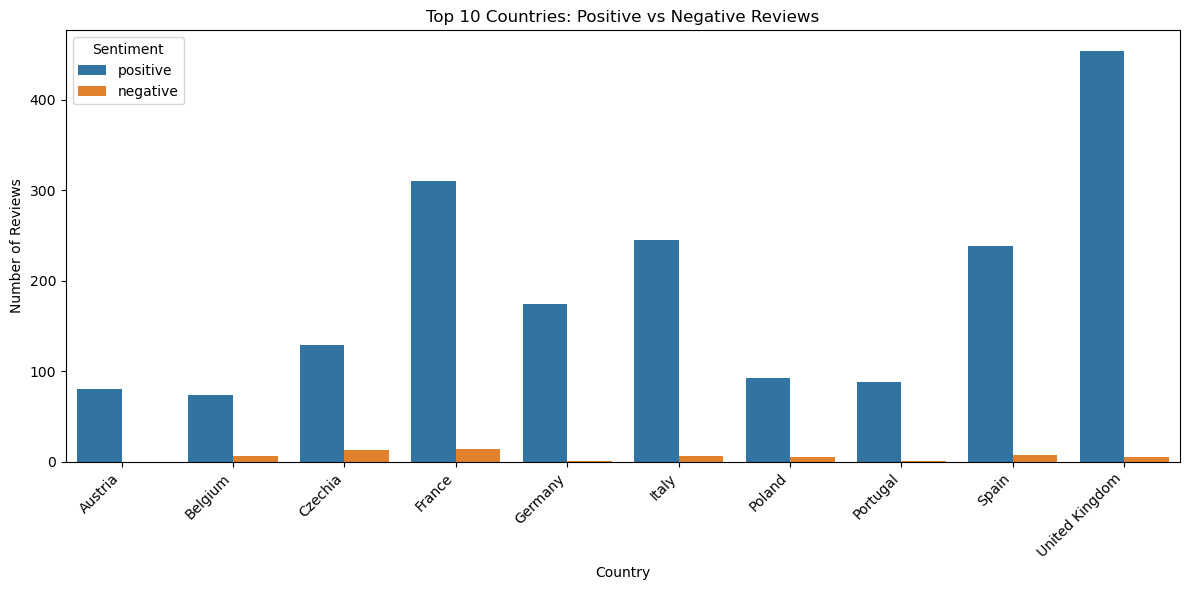

In [12]:
top_countries = df_joined["Country"].value_counts().head(10).index

counts_top = (
    df_joined[df_joined["Country"].isin(top_countries)]
    .groupby(["Country", "Sentiment"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=counts_top,
    x="Country",
    y="count",
    hue="Sentiment"
)

plt.title("Top 10 Countries: Positive vs Negative Reviews")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [13]:
df_joined['tokens'] = df_joined['Review'].apply(
    lambda x: word_tokenize(x.lower())
)
df_joined

,Name,Author,Rating,Review,Sentiment,Latitude,Longitude,Adminstrative_Area_Level_1,Adminstrative_Area_Level_2,Municipality,...,Postal_Code,Address,Editorial_Summary,Open_Hours,User_Rating,Wheelchair_Accessible_Entrance,Phone_Number,International_Phone_Number,Website,tokens
0,Hotel Grad Otočec,Ivet Sotirova,4,"More than a great and magical place. Clean, ta...",positive,45.838009,15.234847,NaN,NaN,Novo mesto,...,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/,"[more, than, a, great, and, magical, place, .,..."
1,Hotel Grad Otočec,Gordana Podvezanec,5,"The Otočec castle, built on one of the islands...",positive,45.838009,15.234847,NaN,NaN,Novo mesto,...,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/,"[the, otočec, castle, ,, built, on, one, of, t..."
2,Hotel Grad Otočec,Blaž Lusavec,5,Very tasty large cup of cappuccino and very go...,positive,45.838009,15.234847,NaN,NaN,Novo mesto,...,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/,"[very, tasty, large, cup, of, cappuccino, and,..."
3,Hotel Grad Otočec,Uros R.,5,A beautiful castle to visit on an island on Kr...,positive,45.838009,15.234847,NaN,NaN,Novo mesto,...,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/,"[a, beautiful, castle, to, visit, on, an, isla..."
4,Hotel Grad Otočec,Bogdan Tertinek,5,This magnificent five-stars hotel hosts also a...,positive,45.838009,15.234847,NaN,NaN,Novo mesto,...,8222,"Grajska cesta 2, 8222 Otočec, Slovenia",Refined hotel in a medieval castle offering a ...,NaN,1847.0,True,(07) 384 89 01,+386 7 384 89 01,http://www.grad-otocec.com/,"[this, magnificent, five-stars, hotel, hosts, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,Oystermouth Castle,Kate Long,5,Really interesting castle with a long and rich...,positive,51.576800,-4.002459,Mumbles,Swansea,Wales,...,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle,"[really, interesting, castle, with, a, long, a..."
2547,Oystermouth Castle,Mia Thurgood,5,"Very nice castle, prices were good and family ...",positive,51.576800,-4.002459,Mumbles,Swansea,Wales,...,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle,"[very, nice, castle, ,, prices, were, good, an..."
2548,Oystermouth Castle,Rohit Mishra,4,A perfect visit on a sunny day. It's a old cas...,positive,51.576800,-4.002459,Mumbles,Swansea,Wales,...,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle,"[a, perfect, visit, on, a, sunny, day, ., it, ..."
2549,Oystermouth Castle,Joseph Emman Pineda,4,This is definitely worth a stop if you're visi...,positive,51.576800,-4.002459,Mumbles,Swansea,Wales,...,SA34BA,"Castle Ave, Mumbles, Swansea SA3 4BA, UK",Remains of a castle in use from 1106 to around...,"['Monday: 1100 - 1700', 'Tuesday: 1100 - 1700'...",956.0,True,NaN,NaN,http://swansea.gov.uk/oystermouthcastle,"[this, is, definitely, worth, a, stop, if, you..."


Before stopword removal

In [15]:
# Number of tokens before deleting stopwords
total_tokens = df_joined['tokens'].apply(len).sum()
total_tokens

158541

In [16]:
negations = {"not", "no", "never", "n't", "cannot", "don't", "won't", "isn't", "wasn't", "aren't"}

In [17]:
# Determining the stopwords to be deleted
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove negations from stopwords
stop_words = stop_words - negations
print(f"Default Stopwords: {len(stop_words)} words")

Default Stopwords: 191 words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
custom_stopwords = {'castle', 'hotel', 'property', 'room', 'holiday', 'vacation', 'visit', 'location', 'town', 'place' }

In [19]:
extended_stopwords = stop_words.union(custom_stopwords)
print(f"Extended Stopwords: {len(extended_stopwords)} words")

Extended Stopwords: 201 words


In [20]:
punctuation = set(string.punctuation)

In [21]:
df_joined["filtered_tokens"] = df_joined["tokens"].apply(
    lambda tokens: [word for word in tokens if word not in extended_stopwords and word not in punctuation]
)


After stopword removal

In [23]:
tokens_minus_stopwords = df_joined['filtered_tokens'].apply(len).sum()
tokens_minus_stopwords

71494

In [24]:
df_joined["filtered_tokens"]

0       [great, magical, clean, tasty, unique, walks, ...
1       [otočec, built, one, islands, krka, river, slo...
2       [tasty, large, cup, cappuccino, good, fresh, i...
3       [beautiful, island, krka, river, see, details,...
4       [magnificent, five-stars, hosts, also, micheli...
                              ...                        
2546    [really, interesting, long, rich, history, vol...
2547    [nice, prices, good, family, tickets, availabl...
2548    [perfect, sunny, day, 's, old, not, good, shap...
2549    [definitely, worth, stop, 're, visiting, wales...
2550    [n't, manage, go, inside, shut, disappointing,...
Name: filtered_tokens, Length: 2551, dtype: object

# 1) AFINN  

In [26]:
def afinn_sentiment(tokens):
    if not tokens:
        return 0
    return sum(afinn.score(word) for word in tokens)

df_joined["afinn_score"] = df_joined["filtered_tokens"].apply(afinn_sentiment)

In [27]:
print(df_joined['afinn_score'].notnull().sum())
print(len(df_joined))

2551
2551


In [28]:
def afinn_label(score):
    if score > 0:
        return "positive"
    elif score <= 0:
        return "negative"

df_joined["afinn_sentiment"] = df_joined["afinn_score"].apply(afinn_label)

In [29]:
# Flatten tokens with sentiment filtering
sentiment_value = "positive" 

# Filter dataframe
df_filtered = df_joined[df_joined["afinn_sentiment"] == sentiment_value]

# Flatten list of tokens
all_tokens = [token for tokens in df_filtered["filtered_tokens"] for token in tokens]

# Count occurrences
token_counts = Counter(all_tokens)

# Map tokens to AFINN scores
from afinn import Afinn
afinn = Afinn()

# Build table
data = []
for token, count in token_counts.items():
    value = afinn.score(token)
    data.append({"word": token, "value": value, "n": count})

df_word_table = pd.DataFrame(data)

# Sort by frequency descending
df_word_table = df_word_table.sort_values(by="n", ascending=False).reset_index(drop=True)

# Show top 20 words
print(df_word_table.head(20))

         word  value    n
0   beautiful    3.0  815
1         not    0.0  692
2        nice    3.0  660
3       great    3.0  651
4          's    0.0  526
5        well    0.0  522
6       worth    2.0  490
7       views    0.0  489
8        walk    0.0  455
9      around    0.0  435
10          ’    0.0  431
11    history    0.0  428
12       also    0.0  403
13        see    0.0  402
14       tour    0.0  398
15       good    3.0  395
16    amazing    4.0  387
17       time    0.0  349
18        n't    0.0  343
19        one    0.0  334


By looking at the 20 most common tokens we can see that there is still some cleaning to be done. Especially instances such as punctuation `'` that was not removed, possessive contractions `'s` as well as negation contraction `n't`. Moreover, vast majority of words are also what can be treated as custom stopwords in this example. Words such as `views`, `walk` or `tour` appear very often among the reviews, however they do not carry any sentiment.

In [31]:
candidate_stopwords = df_word_table[
    (df_word_table["value"] == 0) &   # no sentiment
    (df_word_table["n"] > 150)        # very frequent
]["word"].tolist()

candidate_stopwords[:30]

['not',
 "'s",
 'well',
 'views',
 'walk',
 'around',
 '’',
 'history',
 'also',
 'see',
 'tour',
 'time',
 "n't",
 'one',
 'inside',
 'really',
 'view',
 'parking',
 'day',
 'gardens',
 'get',
 'take',
 'would',
 'small',
 'go',
 'park',
 'rooms',
 'lot',
 'guide',
 'palace']

In [32]:
late_punct = set(string.punctuation) | {"’", "‘"}
late_noise = {"'s", "n't"}
custom_stopwords = set(candidate_stopwords)

final_stopwords = late_punct | late_noise | custom_stopwords

In [33]:
df_joined["filtered_tokens_clean"] = df_joined["filtered_tokens"].apply(
    lambda tokens: [
        w for w in tokens
        if w not in final_stopwords
        and w.isalpha()
    ]
)

In [34]:
# Step 1 — Flatten tokens with sentiment filtering
sentiment_value = "positive"  # or "negative"

# Filter dataframe
df_filtered = df_joined[df_joined["afinn_sentiment"] == sentiment_value]

# Flatten list of tokens
all_tokens = [token for tokens in df_filtered["filtered_tokens_clean"] for token in tokens]

# Step 2 — Count occurrences
token_counts = Counter(all_tokens)

# Step 3 — Map tokens to AFINN scores
from afinn import Afinn
afinn = Afinn()

# Build table
data = []
for token, count in token_counts.items():
    value = afinn.score(token)
    data.append({"word": token, "value": value, "n": count})

df_word_table = pd.DataFrame(data)

# Step 4 — Sort by frequency descending
df_word_table = df_word_table.sort_values(by="n", ascending=False).reset_index(drop=True)

# Step 5 — Show top 20 words
print(df_word_table.head(20))

           word  value    n
0     beautiful    3.0  815
1          nice    3.0  660
2         great    3.0  651
3         worth    2.0  490
4          good    3.0  395
5       amazing    4.0  387
6   interesting    2.0  325
7        lovely    3.0  261
8     recommend    2.0  259
9          free    1.0  252
10          top    2.0  229
11         like    2.0  210
12           no   -1.0  156
13     stunning    4.0  153
14    wonderful    4.0  150
15      outside    0.0  150
16         food    0.0  150
17     friendly    2.0  147
18       ticket    0.0  145
19         must    0.0  144


In [35]:
afinn = Afinn()

# Flatten all clean tokens
all_tokens = [w for tokens in df_joined["filtered_tokens_clean"] for w in tokens]

# Compute AFINN score for each token
token_scores = [afinn.score(w) for w in all_tokens]

# Convert to dataframe
df_token_scores = pd.DataFrame({"value": token_scores})

# Filter out neutral tokens (value != 0)
df_token_scores = df_token_scores[df_token_scores["value"] != 0]

# Count distribution
token_sentiment_dist = (
    df_token_scores["value"]
    .value_counts()
    .sort_index()
    .reset_index()
)

token_sentiment_dist.columns = ["value", "n"]

token_sentiment_dist

,value,n
0,-4.0,11
1,-3.0,153
2,-2.0,830
3,-1.0,674
4,1.0,1465
5,2.0,3478
6,3.0,4084
7,4.0,1025
8,5.0,100


C:\Users\Lukasz\AppData\Local\Temp\ipykernel_30740\1336567142.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "n"))
C:\Users\Lukasz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Lukasz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, *

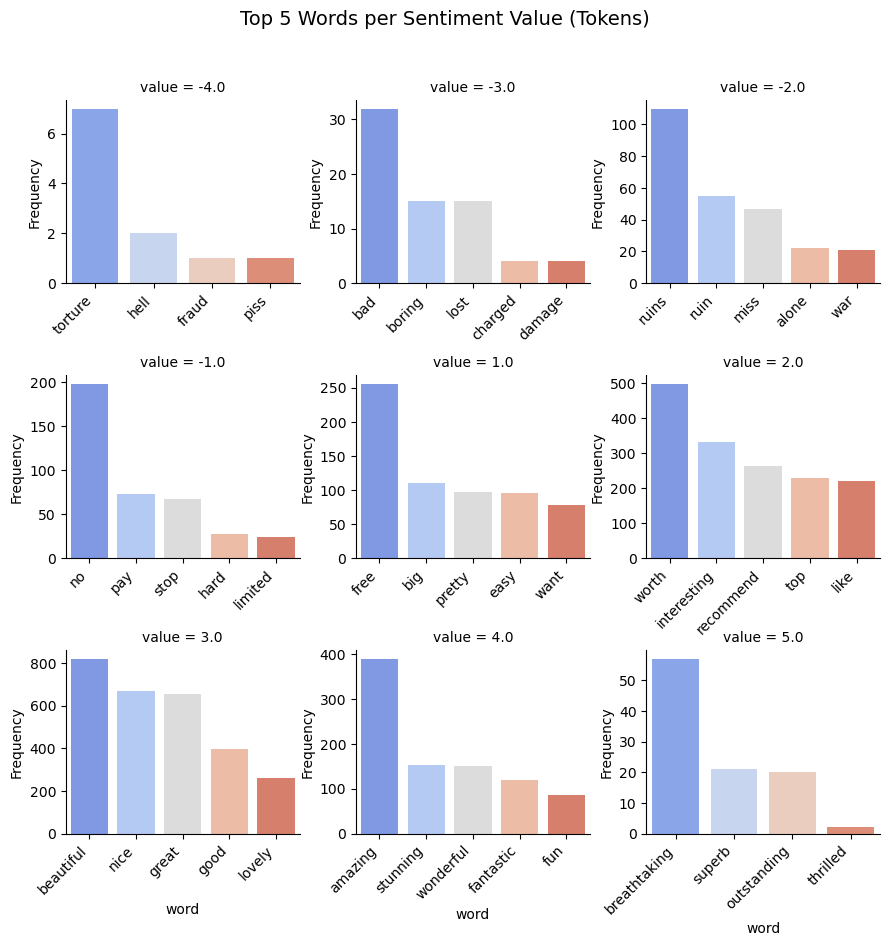

In [36]:
token_data = []

for tokens in df_joined["filtered_tokens_clean"]:
    for w in tokens:
        score = afinn.score(w)
        if score != 0:  # ignore neutral
            token_data.append({"word": w, "value": score})

df_tokens = pd.DataFrame(token_data)

# Count frequency of each word per sentiment value
df_counts = (
    df_tokens.groupby(["value", "word"])
    .size()
    .reset_index(name="n")
)

#  Select top 5 words per sentiment value
top_words = (
    df_counts.groupby("value")
    .apply(lambda x: x.nlargest(5, "n"))
    .reset_index(drop=True)
)

g = sns.FacetGrid(top_words, col="value", col_wrap=3, sharex=False, sharey=False, height=3)
g.map_dataframe(
    sns.barplot,
    x="word",
    y="n",
    palette="coolwarm"
)

# Rotate x labels
for ax in g.axes.flat:
    ax.set_ylabel("Frequency")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # rotate + align right

# Adjust spacing between subplots to prevent overlap
g.fig.subplots_adjust(top=0.88, hspace=0.5)

g.fig.suptitle("Top 5 Words per Sentiment Value (Tokens)", fontsize=14)
plt.show()

In [37]:
df_joined['afinn_review_score'] = df_joined['filtered_tokens_clean'].apply(
    lambda tokens: sum(afinn.score(w) for w in tokens)
)

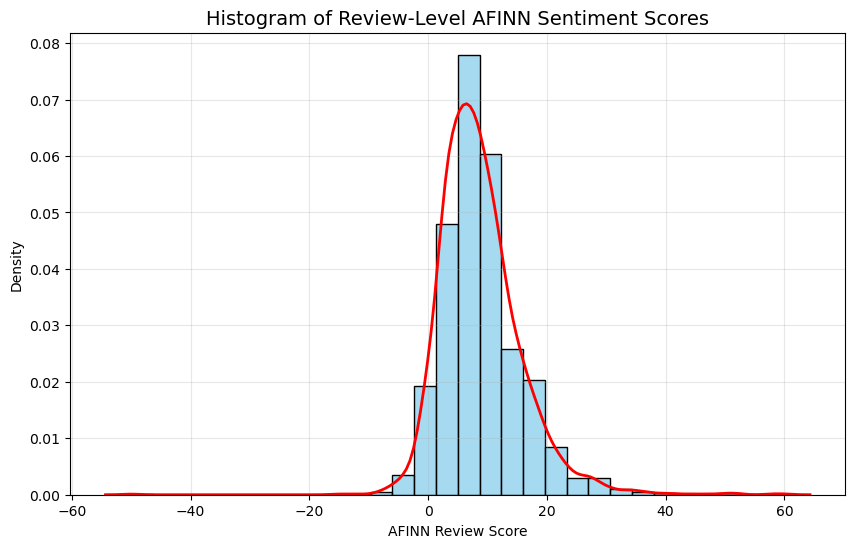

In [38]:
# Plot histogram first
plt.figure(figsize=(10,6))
sns.histplot(
    df_joined['afinn_review_score'],
    bins=30,
    color='skyblue',
    stat="density",
    edgecolor='black'
)

# Overlay KDE with red line
sns.kdeplot(
    df_joined['afinn_review_score'],
    color='red',       # red line
    linewidth=2
)

plt.title('Histogram of Review-Level AFINN Sentiment Scores', fontsize=14)
plt.xlabel('AFINN Review Score')
plt.ylabel('Density')
plt.grid(alpha=0.3)
plt.show()

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_30740\1314137310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


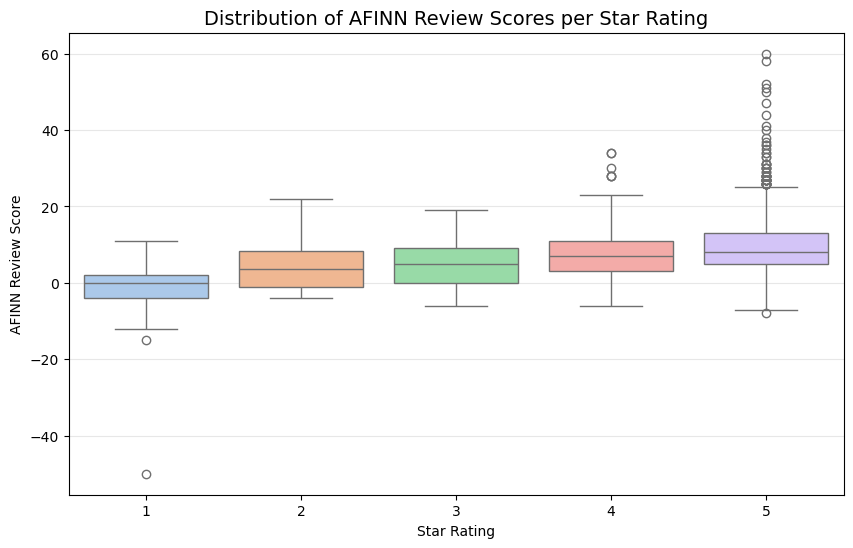

In [39]:
# Boxplot: sentiment score vs. star rating
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Rating',  # star rating (1–5)
    y='afinn_review_score',
    data=df_joined,
    palette='pastel'
)

plt.title('Distribution of AFINN Review Scores per Star Rating', fontsize=14)
plt.xlabel('Star Rating')
plt.ylabel('AFINN Review Score')
plt.grid(alpha=0.3, axis='y')
plt.show()

In [77]:
df_joined["tokens_for_bigrams"] = df_joined["Review"].str.lower().str.split().apply(
    lambda tokens: [w for w in tokens if w.isalpha() and w not in stop_words]
)
df_joined["bigrams"] = df_joined["tokens_for_bigrams"].apply(lambda x: list(bigrams(x)))

In [79]:
df_bigrams = pd.DataFrame(
    [bg for row in df_joined["bigrams"] for bg in row],
    columns=["word1", "word2"]
)

In [81]:
negated_bigrams = df_bigrams[df_bigrams["word1"].isin(negations)].copy()

In [83]:
negated_bigrams["value"] = negated_bigrams["word2"].apply(afinn.score)

In [85]:
negated_bigrams["value"] = -negated_bigrams["value"]

negated_bigrams["sentiment"] = negated_bigrams["value"].apply(
    lambda x: "positive" if x > 0 else "negative"
)

In [87]:
negated_summary = (
    negated_bigrams
    .groupby(["word1", "word2", "sentiment"])
    .size()
    .reset_index(name="n")
    .sort_values("n", ascending=False)
)

negated_summary.head(20)

,word1,word2,sentiment,n
404,not,much,negative,32
206,not,allowed,negative,14
553,not,worth,negative,13
301,not,far,negative,13
234,not,busy,negative,11
508,not,sure,negative,11
135,no,one,negative,10
285,not,even,negative,10
202,not,accessible,negative,10
505,not,suitable,negative,8


REGULAR BIGRAMS

In [90]:
# Generate all bigrams
all_bigrams = [
    bg
    for tokens in df_joined["filtered_tokens_clean"]
    for bg in bigrams(tokens)
]

# Convert to DataFrame
df_bigrams = pd.DataFrame(all_bigrams, columns=["word1", "word2"])

# Count frequency
bigram_counts = (
    df_bigrams
    .value_counts()
    .reset_index(name="n")
    .sort_values("n", ascending=False)
)

bigram_counts.head(20)

,word1,word2,n
0,highly,recommend,66
1,gift,shop,54
2,make,sure,45
3,highly,recommended,36
4,worth,visiting,33
5,guided,tours,27
6,ice,cream,27
7,recommend,visiting,23
8,buy,tickets,23
9,absolutely,beautiful,21


In [103]:
bigram_counts["afinn_score"] = (
    bigram_counts["word1"].apply(afinn.score) +
    bigram_counts["word2"].apply(afinn.score)
)

In [109]:
top_positive_bigrams = (
    bigram_counts
    .query("afinn_score > 0")
    .sort_values("n", ascending=False)
    .head(20)
)

top_positive_bigrams

,word1,word2,n,afinn_score
0,highly,recommend,66,2.0
1,gift,shop,54,2.0
3,highly,recommended,36,2.0
4,worth,visiting,33,2.0
7,recommend,visiting,23,2.0
9,absolutely,beautiful,21,3.0
11,top,hill,20,2.0
12,free,entry,19,1.0
13,hidden,gem,19,3.0
14,friendly,helpful,17,4.0


In [113]:
top_negative_bigrams = (
    bigram_counts
    .query("afinn_score < 0")
    .sort_values("n", ascending=False)
    .head(20)
)

top_negative_bigrams

,word1,word2,n,afinn_score
69,need,pay,9,-1.0
213,bus,stop,6,-1.0
339,must,stop,5,-1.0
277,world,war,5,-2.0
529,told,no,4,-1.0
430,almost,no,4,-1.0
407,no,cafe,4,-1.0
439,pay,card,4,-1.0
542,bit,disappointing,4,-2.0
450,wo,regret,4,-2.0


# VADER

In [118]:
vader = SentimentIntensityAnalyzer()

In [120]:
# Compute VADER scores
df_joined['vader_scores'] = df_joined['Review'].apply(vader.polarity_scores)

# Extract compound score (overall sentiment from -1 to 1)
df_joined['vader_compound'] = df_joined['vader_scores'].apply(lambda x: x['compound'])

In [122]:
df_joined['vader_pos'] = df_joined['vader_scores'].apply(lambda x: x['pos'])
df_joined['vader_neg'] = df_joined['vader_scores'].apply(lambda x: x['neg'])

In [142]:
df_joined["vader_sentiment"] = np.where(
    df_joined["vader_compound"] > 0,  # treat neutral (0) as negative
    "positive",
    "negative"
)

# Check distribution
df_joined["vader_sentiment"].value_counts()

vader_sentiment
positive    2376
negative     175
Name: count, dtype: int64

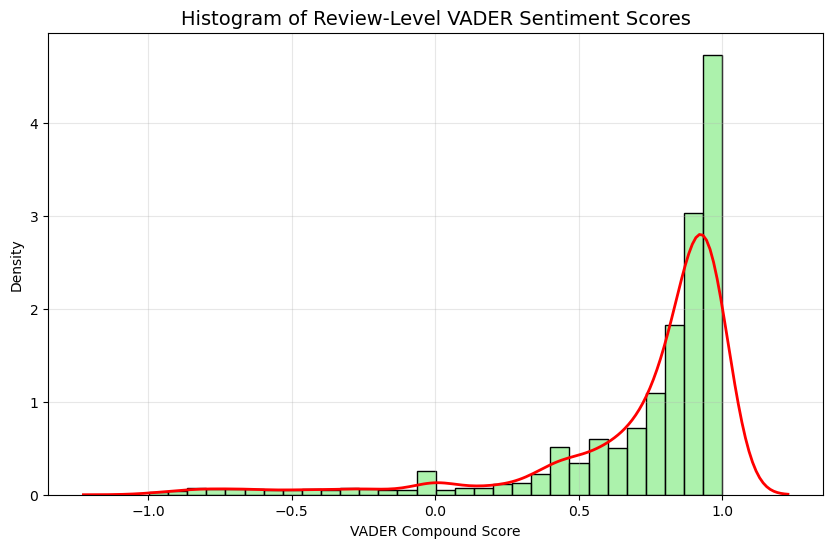

In [156]:
# Plot histogram first
plt.figure(figsize=(10,6))
sns.histplot(
    df_joined['vader_compound'],
    bins=30,
    color='lightgreen',
    stat="density",
    edgecolor='black'
)

# Overlay KDE with red line
sns.kdeplot(
    df_joined['vader_compound'],
    color='red',       # red line
    linewidth=2
)

plt.title('Histogram of Review-Level VADER Sentiment Scores', fontsize=14)
plt.xlabel('VADER Compound Score')
plt.ylabel('Density')
plt.grid(alpha=0.3)
plt.show()

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_30740\488565177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


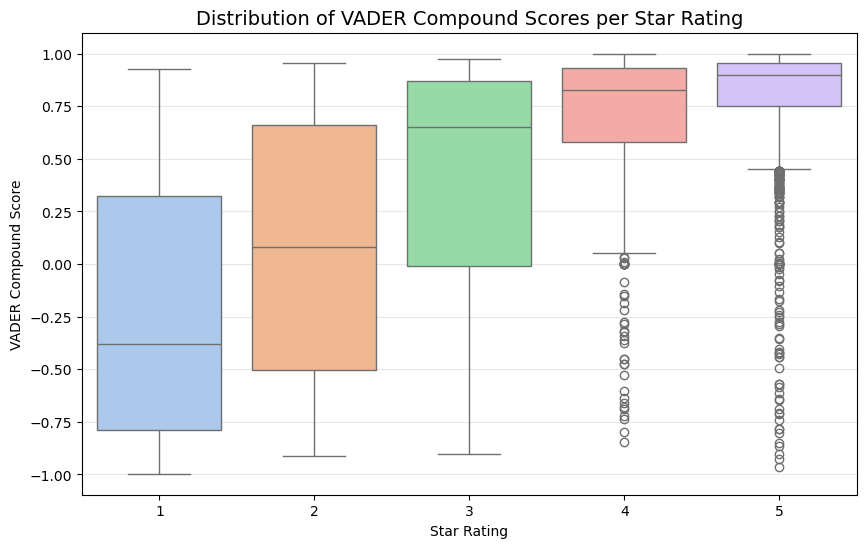

In [158]:
# Boxplot: VADER sentiment score vs. star rating
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Rating',  # star rating (1–5)
    y='vader_compound',
    data=df_joined,
    palette='pastel'
)

plt.title('Distribution of VADER Compound Scores per Star Rating', fontsize=14)
plt.xlabel('Star Rating')
plt.ylabel('VADER Compound Score')
plt.grid(alpha=0.3, axis='y')
plt.show()

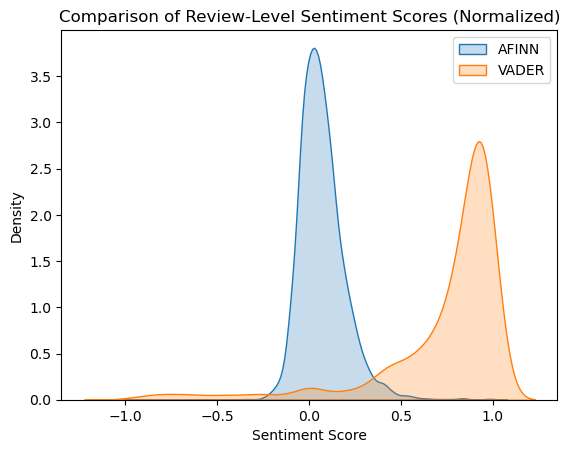

In [152]:
# Scale AFINN to -1 to 1
afinn_scores = df_joined['afinn_review_score'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(-1,1))
df_joined['afinn_scaled'] = scaler.fit_transform(afinn_scores)

# Plot
sns.kdeplot(df_joined['afinn_scaled'], label='AFINN', fill=True)
sns.kdeplot(df_joined['vader_compound'], label='VADER', fill=True)
plt.title("Comparison of Review-Level Sentiment Scores (Normalized)")
plt.xlabel("Sentiment Score")
plt.legend()
plt.show()